In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data  = pd.read_csv(r'C:\Users\Aditya\OneDrive - Manipal Academy of Higher Education\Desktop\SP\Manas\Datasets\linear_regression_dataset.csv')

In [3]:
data.head()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754


In [4]:
df =data.fillna(value=data['RACE'].mean())

In [5]:
df.isnull().sum()

AGE       0
FEMALE    0
LOS       0
RACE      0
TOTCHG    0
APRDRG    0
dtype: int64

In [6]:
df.columns

Index(['AGE', 'FEMALE', 'LOS', 'RACE', 'TOTCHG', 'APRDRG'], dtype='object')

In [7]:
X = df[['AGE', 'FEMALE', 'LOS', 'RACE','APRDRG']]
Y = df['TOTCHG']

In [8]:
#normalising the data
for i in X.columns:
    X = X - X.mean(axis=0)
    X[i] = X[i]/np.max(np.abs(X[i]))

In [9]:
#data splitting
df = df.sample(frac=1)
indices = range(df.shape[0])
train_size = int(0.8 * df.shape[0])
train_indices = indices[:train_size]
test_indices = indices[train_size:]

Xtrain, Xtest = X.iloc[train_indices], X.iloc[test_indices]
Ytrain, Ytest = Y.iloc[train_indices], Y.iloc[test_indices]


In [10]:
def CostFunction(X,Y,theta,constant):
    cost = np.sum((((X.dot(theta) + constant) - Y) ** 2) / (2*len(Y)))
    return cost

def GradientDescent(X,Y, theta, constant, learning_rate, iterations):
    cost_list = [0] * iterations
   
    for i in range(iterations):
        hypo = X.dot(theta) + constant
        loss = hypo - Y
        
        weight = X.T.dot(loss) / len(Y)
        
        bias = np.sum(loss) / len(Y)
        
        theta = theta - learning_rate*weight
        
        constant = constant - learning_rate*bias
        
        cost = CostFunction(X, Y, theta, constant)
        
        cost_list[i] = cost
        
        if (i%(iterations/10)==0):
            print("Cost is:",cost)
        
        
    return theta, constant, cost_list
    

In [11]:
theta,constant, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.05,iterations=10000)

Cost is: 12664545.311856706
Cost is: 5586175.420072367
Cost is: 4719408.683284788
Cost is: 4355167.6049125325
Cost is: 4201984.199573486
Cost is: 4137517.481876965
Cost is: 4110368.037301174
Cost is: 4098926.4049525363
Cost is: 4094101.193436214
Cost is: 4092064.876785663


In [12]:
theta

AGE        1658.594974
FEMALE     -196.780477
LOS       28240.477463
RACE      -1493.727331
APRDRG    -4537.475889
dtype: float64

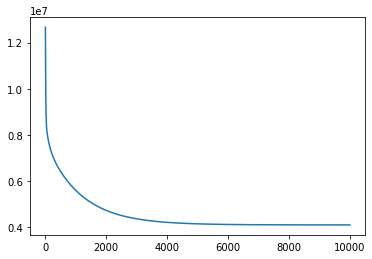

In [13]:
plt.plot(c)

In [14]:
theta

AGE        1658.594974
FEMALE     -196.780477
LOS       28240.477463
RACE      -1493.727331
APRDRG    -4537.475889
dtype: float64

In [15]:
def predict(X, theta, constant): 
    return X.dot(theta) + constant
y_pred = predict(Xtest, theta, constant)
preds = X.dot(theta) + constant

In [19]:
def r2score(y_pred, Ytest):
    rss = np.sum((y_pred - Ytest) ** 2)
    tss = np.sum((Ytest-Y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
r2score(y_pred, Ytest)

0.7859544460428939

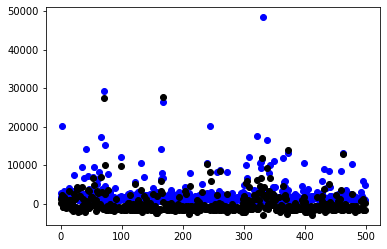

In [18]:
plt.scatter(x= list(range(0,len(Y))),y=Y, color ='blue')

for i in range(len(X)):
    plt.scatter(x=i,y=(np.sum(X.iloc[i]*theta)), color='black')
